# Turning Hormone Cycles into Sound

Hormones are responsible for all kind of functions in our body, many of which run on a 24 hour cycle.

One fun way to interpret our hormone cycles is to turn them into sound waves. If each hormone has a different sound which decreases and increases with the same profile as the hormone cycle, we can overlay these sounds and make something...interesting!

**Lets look at some other hormones in our body...**

- **Cortisol** - We are now familiar with cortisol, the hormone that is responsible for managing stress and helps us wake up in the morning. Cortisol peaks when we wake up, then decreases throughout the day.
- **Melatonin** - Melatonin is the hormone that makes us sleepy. It is low during the day and peaks when we go to bed until we wake up. This is why going to bed and waking up at the same time is better for our body, as our melatonin cycle stays the same and isn't all over the place. 
- **Ghrelin** - Ghrelin is the hormone that tells us we're hungry, so peaks at meal times.

**Today we are going to take these 3 hormone cycles, overlay them, and make a personalised sound that matches your daily hormones!**



**Step 1:** Write down when your hormones peak:

- **Cortisol** - When do you wake up?
- **Melatonin** - When do you go to bed, and when do you wake up?
- **Ghrelin** - What time do you eat Breakfast, Lunch and Dinner?

You will need to enter these values into the code later on!

**Step 2** - Sound.

We will pick a sound frequency for each hormone. We want them to be different so we can tell them apart, but also sound good together, therefore to begin with we have decided to pick 3 frequencies that make up the chord **A minor**.

- **Cortisol** - 659.25 Hz (A4)
- **Melatonin** - 329.63 Hz (C5)
- **Ghrelin** - 261.63 Hz (E5)

When all 3 frequencies are played at the same time, it makes the chord A minor.
If there is time at the end of the task, you can play around with the sound frequencies and pick different chords.



**Step 3** - lets make some noise!

This first section of code imports all the Python packages we need, and starts creating a **time series** for each hormone profile. 

A **time series** is a plot that looks at data over time, so in our case to mimic the 24 hour hormone cycle, we will look at the hormone (sound) profile over 24 seconds.

**Run this section of code...**

In [5]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Define parameters
fs = 44100              # Sampling frequency in Hz
duration = 24           # Duration of the sound in seconds
t_uniform = np.linspace(0, duration, fs * duration)  # Uniform time vector for audio

# Time series 1 (Ghrelin, representing hunger hormone)
time_points1 = np.arange(25)
values1 = np.zeros(25)

# Time series 2 (Melatonin, sleep-related hormone)
time_points2 = np.arange(25)
values2 = np.zeros(25)

print("This section of code has ran successfully!")

This section of code has ran successfully


**Step 4:** In this next section of code, we pick the frequencies we want the sounds to be, and state what time the hormone peaks are.

- We will keep the frequencies the same for now.
- Ghrelin: Enter your meal times into **values1[breakfast, lunch, dinner]** (using 24 hour clock)
- Melatonin: Enter when you are asleep into **values2[  ,  ]**. We have to do this twice and split up the values as the data runs from midnight to midnight (00:00 - 24:00). So if you go to sleep at 10pm and wake up at 7am, this is at the end of the day so you enter values2[22:24], and then from midnight to 7am, values2[0:7]. Ask a research to help explain this if it doesn't make sense.
- Cortisol: Enter what time you wake up and what tme you go to sleep into **time_points3 = np.array([wake up, sleep])**


In [7]:


# EDIT HERE ONLY
########################################################################
# Define frequencies for the C major chord (C4, E4, G4)
#frequencies = [261.63, 329.63, 392.00]  # Frequencies in Hz

# Define frequencies for an A minor chord (A4, C5, E5)
frequencies = [440, 523.25, 659.25]  # Frequencies in Hz

# Ghrelin, when do you eat?
values1[[8, 12, 17]] = 1  # Mealtimes at 8 AM, 12 PM, and 5 PM

# Melatonin, when do you sleep?
values2[0:8] = 1        # Midnight to 7 AM
values2[22:25] = 1      # 10 PM to Midnight

# Cortisol, what time do you wake up? what time do you go to sleep?
time_points3 = np.array([7, 22])

########################################################################
# STOP EDITING


print("This section of code has ran successfully!")

This section of code has ran successfully!


**Step 5:** The next section of code turns the hormone information we have just given into a time series, and converts this into sound!

It will also plot a graph showing the hormone cycles overlapped, so we can see when each one will peak.

**Run this section of code...**

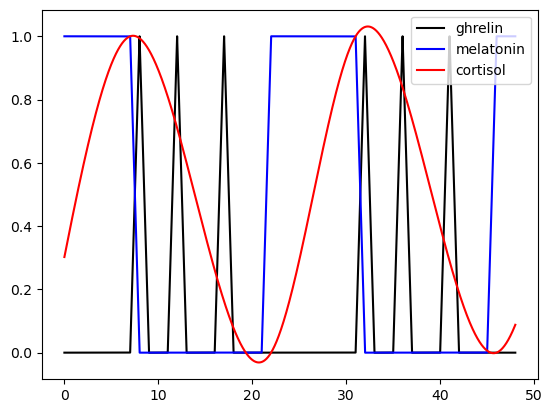

In [8]:
# Time series 3 (Cortisol, representing stress hormone)
values3 = np.array([1, 0])
# Extend time_points3 to simulate periodicity
time_points3 = np.concatenate((time_points3 - 24, time_points3, time_points3 + 24, time_points3 + 48))
values3 = np.tile(values3, 4)

# Extend time_points2 to simulate periodicity
time_points2 = np.concatenate((time_points2 - 24, time_points2, time_points2 + 24))
values2 = np.tile(values2, 3)

# Extend time_points2 to simulate periodicity
time_points1 = np.concatenate((time_points1 - 24, time_points1, time_points1 + 24))
values1 = np.tile(values1, 3)                 


t_uniform = np.concatenate((t_uniform[0:-1], t_uniform + 24))
# Interpolate each time series over the uniform time vector
interp_series1 = interp1d(time_points1, values1, kind='linear', fill_value="extrapolate")(t_uniform)
interp_series2 = interp1d(time_points2, values2, kind='linear', fill_value="extrapolate")(t_uniform)
interp_series3 = interp1d(time_points3, values3, kind='cubic', fill_value="extrapolate")(t_uniform)

# Normalize each interpolated series to range [0, 1] for amplitude modulation
normalized_series1 = (interp_series1 - np.min(interp_series1)) / (np.max(interp_series1) - np.min(interp_series1))
normalized_series2 = (interp_series2 - np.min(interp_series2)) / (np.max(interp_series2) - np.min(interp_series2))
normalized_series3 = (interp_series3 - np.min(interp_series3)) / (np.max(interp_series3) - np.min(interp_series3))

# Generate the sine waves for each frequency and apply amplitude modulation
tone1 = np.sin(2 * np.pi * frequencies[0] * t_uniform) * normalized_series1
tone2 = np.sin(2 * np.pi * frequencies[1] * t_uniform) * normalized_series2
tone3 = np.sin(2 * np.pi * frequencies[2] * t_uniform) * normalized_series3

# Sum the tones to create a chord
chord = tone1 + tone2 + tone3

# Normalize the final chord to avoid clipping
chord /= np.max(np.abs(chord))
tone1 /= np.max(np.abs(tone1))
tone2 /= np.max(np.abs(tone2))
tone3 /= np.max(np.abs(tone3))



# Plot
plt.figure()
plt.plot(t_uniform, interp_series1, 'k', label='ghrelin')
plt.plot(t_uniform, interp_series2, 'b', label='melatonin')
plt.plot(t_uniform, interp_series3, 'r', label='cortisol')
plt.legend(loc = "upper right")
plt.show()

# Save the sound to a .wav file
write('chord.wav', fs, (chord * 32767).astype(np.int16))
write('ghrelin.wav', fs, (tone1 * 32767).astype(np.int16))
write('melatonin.wav', fs, (tone2 * 32767).astype(np.int16))
write('cortisol.wav', fs, (tone3 * 32767).astype(np.int16))


**Step 6:** This graph shows your personalised hormone profiles for Ghrelin, Melatonin and Cortisol!

Now we need to hear what this sounds like. 

The sound files should be saved on the computer. The file titles "Chord" is all 3 playing together, play this sound to see what your hormone profile sounds like!

You can also play the individual hormones